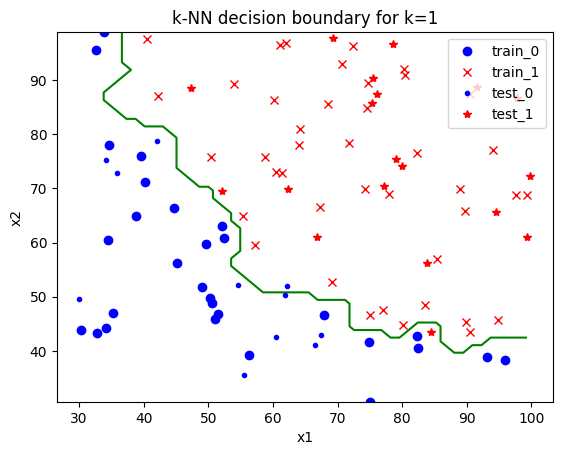

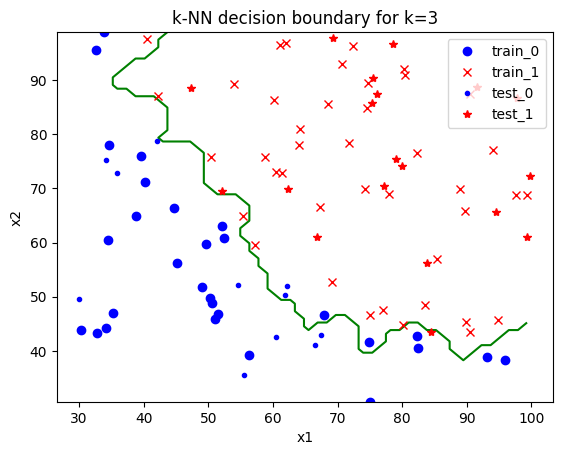

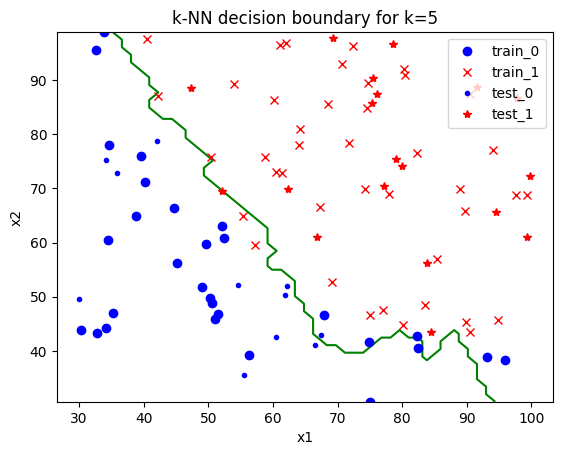

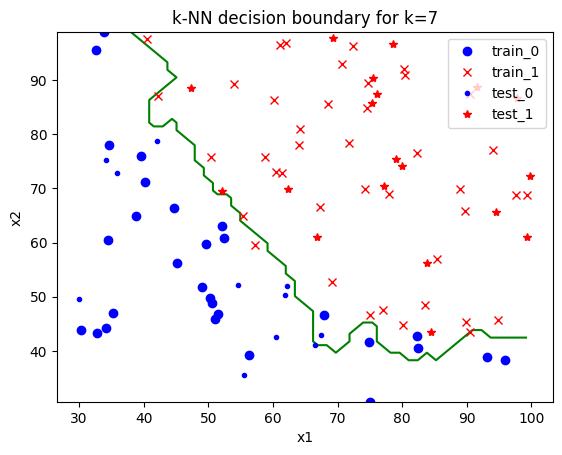

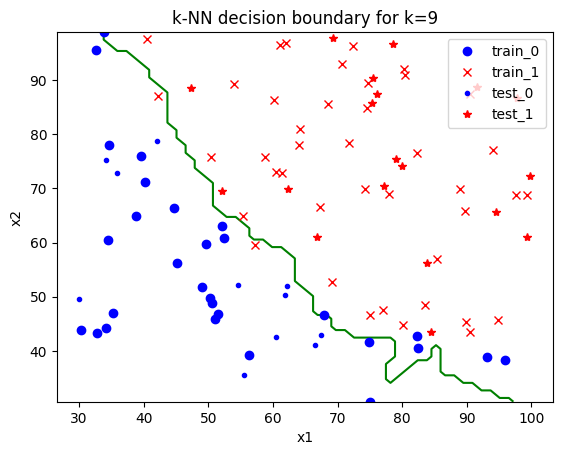

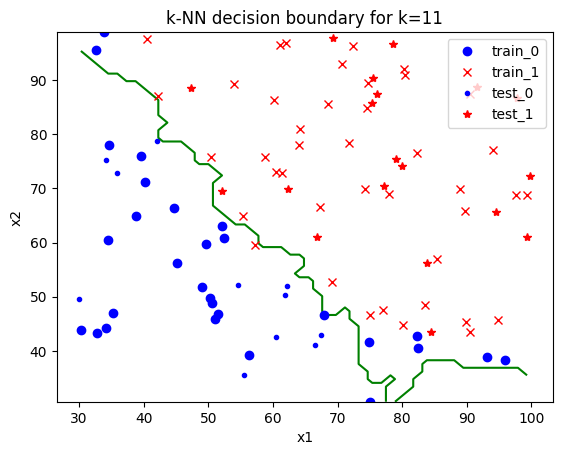

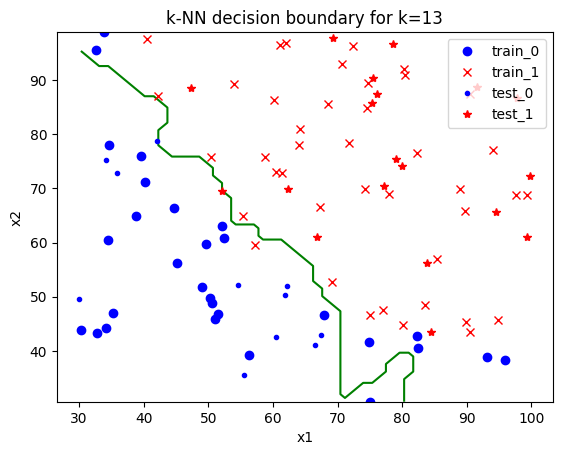

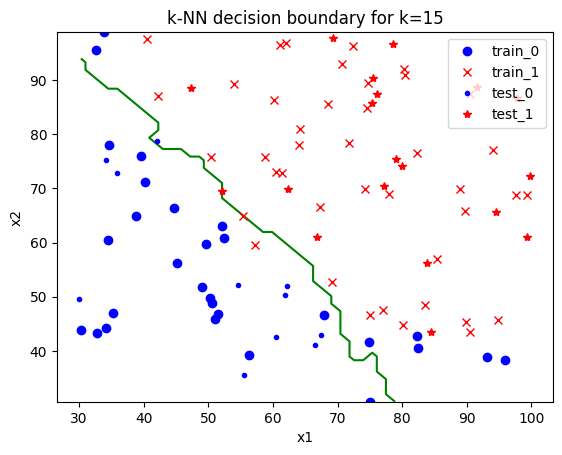

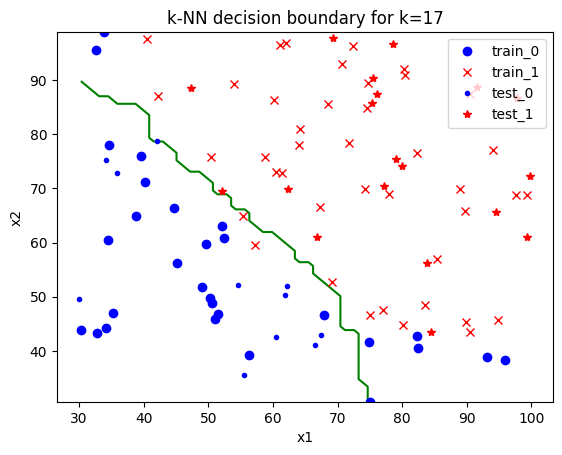

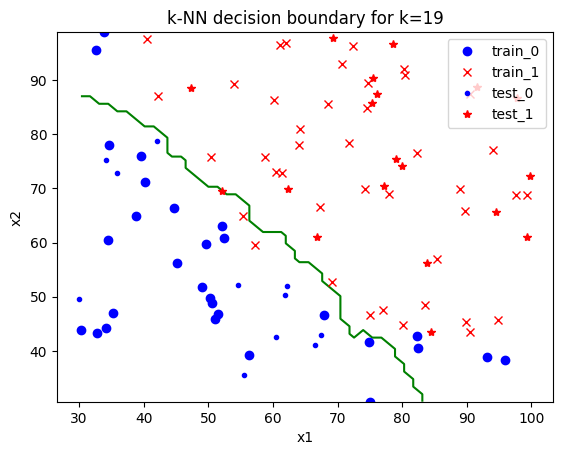

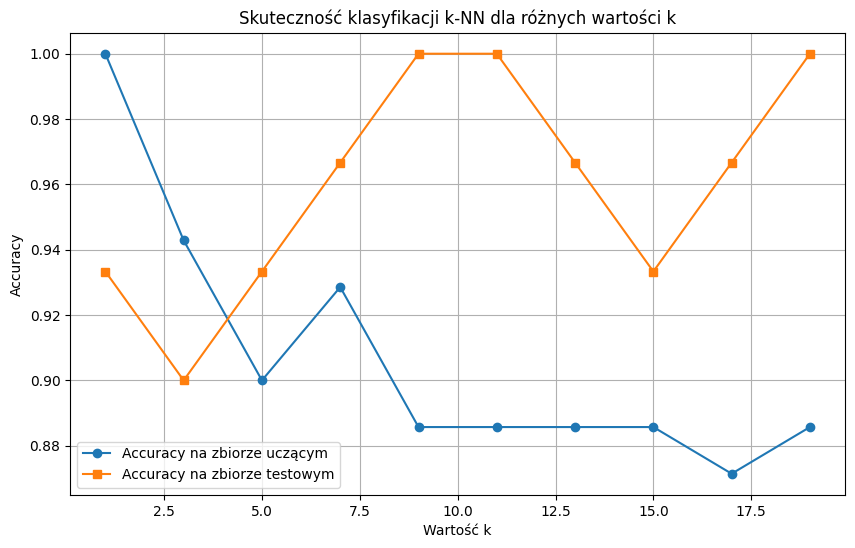

In [141]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

#print("x_train shape:", x_train.shape) # (70, 2)
#print("x_test shape:", x_test.shape) # (30, 2)
#print("y_train shape:", y_train.shape) # (70,)
#print("y_test shape:", y_test.shape) # (30,)
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    # 2. posortuj kolekcję względem dystansów, rosnąco
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
    dystanse = []
    for ele in range(len(X)): ## 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
        suma = 0
        for i in range(len(X[ele])):
            suma += (X[ele][i] - example[i])**2 #. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
        dystans = suma ** 0.5
        dystanse.append((dystans, y[ele]))   #    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    dystanse.sort(key=lambda x: x[0])
    #key to parametr, który mówi, że sortowanie ma być przeprowadzone względem pierwszego elementu krotek (czyli dystansu)
    # co pozwala, aby lista była uporządkowana rosnąco
    k_neighbors = dystanse[:k]
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)

    count_0 = 0
    count_1 = 0
      #count_0 = 0 i count_1 zlicza ile sasiadow ma klasa 0 i 1 


    for _, label in k_neighbors:
        if label == 0:
            count_0 += 1
        else:
            count_1 += 1
    if count_1 > count_0:
        #Jeśli większość sąsiadów ma klasę 1 → zwracamy 1 (czyli przykład example należy do klasy 1).
        #W przeciwnym razie → zwracamy 0.
        return 1
    else:
        return 0


accuracy_train = []
accuracy_test = []
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

for k in k_values:
    # === TEST ===
    y_pred_test = np.zeros(y_test.shape)
    #tworzymy wektor y_pred_test o takich samych wymiarach jak y_test, aby móc zapisać w nim przewidywania dla każdego przykładu testowego
    for example_idx, example in enumerate(x_test):
        #enumerate zwraca pary (indeks, element) dla każdego elementu w x_test
        #przechodzimy przez wszystkie przykłady testowe i dla każdego z nich wywołujemy funkcję classify
        pred = classify(x_train, y_train, example, k)
        y_pred_test[example_idx] = pred
        #przechowujemy przewidywaną klasę dla danego przykładu testowego w y_pred_test pod odpowiednim indeksem
    
    acc_test = np.mean(y_pred_test == y_test)
    #bierzemy cały  wektor y_pred_test i porównujemy go z y_test, aby uzyskać wektor wartości 
    # jeżeli wartości zgadzają się ze sobą to zapisujemy w accuracy_test 1, w przeciwnym razie 0

    #np.mean oblicza średnią z wartości logicznych, co daje nam dokładność klasyfikacji na zbiorze testowym

    accuracy_test.append(acc_test)

    # === TRAIN ===
    y_pred_train = np.zeros(y_train.shape)
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred_train[example_idx] = pred

    acc_train = np.mean(y_pred_train == y_train)
    accuracy_train.append(acc_train)


# prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
        for col_idx in range(x1_res):
            example = np.array([x1[col_idx], x2[row_idx]])
            pred = classify(x_train, y_train, example, k)
            labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')
    plt.title(f'k-NN decision boundary for k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])
    plt.show()


# === WYKRES ===
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_train, marker='o', label='Accuracy na zbiorze uczącym')
plt.plot(k_values, accuracy_test, marker='s', label='Accuracy na zbiorze testowym')
plt.xlabel('Wartość k')
plt.ylabel('Accuracy')
plt.title('Skuteczność klasyfikacji k-NN dla różnych wartości k')
plt.legend()
plt.grid(True)
plt.show()

Według mnie najlepiej model jest reprezentowany przez k=7.


In [142]:
#Czułość klasyfikacji i pozytywne przewidywania (se i pp) dla k=7
k = 7
dokladnosc = 0
pp = 0  # pozytywne przewidywania
tp = 0  # true positives (czyli poprawnie przewidziane 1)
prawdziwych_1 = np.sum(y_test == 1)

y_pred_test = np.zeros(y_test.shape)

for example_idx, example in enumerate(x_test):
    pred = classify(x_train, y_train, example, k)
    y_pred_test[example_idx] = pred

    if pred == y_test[example_idx]:
        dokladnosc += 1

    if pred == 1:
        pp += 1  # jeśli przewidziano klasę 1 (niezależnie czy dobrze)

    if pred == 1 and y_test[example_idx] == 1:
        tp += 1  # jeśli przewidziano 1 i faktycznie to była 1

# Obliczenia
accuracy = dokladnosc / len(y_test) * 100
sensitivity = tp / prawdziwych_1 * 100 if prawdziwych_1 > 0 else 0

print(f"Dokładność klasyfikacji k-NN dla k={k}: {accuracy}%")
print(f"Czułość klasyfikacji (SE): {sensitivity:.2f}%")
print(f"Liczba pozytywnych przewidywań (PP): {prawdziwych_1/pp}, na ilość")



Dokładność klasyfikacji k-NN dla k=7: 96.66666666666667%
Czułość klasyfikacji (SE): 100.00%
Liczba pozytywnych przewidywań (PP): 0.95, na ilość


Powtarzamy ćwiczenie dla klasyfikatora wbudowanego w bilbiotekę scikit-learn i sprawdzamy czy wyniki są takie same jak w przypadky własnej implementacji. 

In [143]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
dokladnosc = 0
pp = 0  # pozytywne przewidywania
tp = 0  # true positives (czyli poprawnie przewidziane 1)
prawdziwych_1 = np.sum(y_test == 1)

y_pred_test = np.zeros(y_test.shape)

for example_idx, example in enumerate(x_test):
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(x_train, y_train)
    pred = knn_classifier.predict([example])[0]

    if pred == y_test[example_idx]:
        dokladnosc += 1

    if pred == 1:
        pp += 1  # jeśli przewidziano klasę 1 (niezależnie czy dobrze)

    if pred == 1 and y_test[example_idx] == 1:
        tp += 1  # jeśli przewidziano 1 i faktycznie to była 1

# Obliczenia
accuracy = dokladnosc / len(y_test) * 100
sensitivity = tp / prawdziwych_1 * 100 if prawdziwych_1 > 0 else 0

print(f"Dokładność klasyfikacji k-NN dla k={k}: {accuracy}%")
print(f"Czułość klasyfikacji (SE): {sensitivity:.2f}%")
print(f"Liczba pozytywnych przewidywań (PP): {prawdziwych_1/pp}, na ilość")

Dokładność klasyfikacji k-NN dla k=7: 96.66666666666667%
Czułość klasyfikacji (SE): 100.00%
Liczba pozytywnych przewidywań (PP): 0.95, na ilość


As we can see everything is perfect 

In [144]:
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix

data = load_digits()
y = data['target']
x = data['data']
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

#print(y.shape, x.shape) # (1797,) (1797, 64)
#print(y.shape) # (1797,)

# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

best_k = None
best_accuracy = 0
best_y_pred = None
best_model = None

print("\n=== Accuracy dla różnych k ===\n")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    acc = np.mean(y_pred_test == y_test) * 100
    print(f"k={k} -> Accuracy: {acc:.2f}%")

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        best_y_pred = y_pred_test
        best_model = knn
    print(f"=== Raport klasyfikacji dla k={k} ===\n")
    print(classification_report(y_test,  y_pred_test))

    print("=== Macierz konfuzji ===\n")
    print(confusion_matrix(y_test,  y_pred_test))

# === Najlepszy model ===
print(f"\n>>> Najlepszy wynik dla k={best_k} z dokładnością {best_accuracy:.2f}%\n")

# Raport i macierz konfuzji
print(f"=== Raport klasyfikacji dla k={best_k} ===\n")
print(classification_report(y_test, best_y_pred))

print("=== Macierz konfuzji ===\n")
print(confusion_matrix(y_test, best_y_pred))


=== Accuracy dla różnych k ===

k=1 -> Accuracy: 99.81%
=== Raport klasyfikacji dla k=1 ===

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        44
           8       1.00      0.98      0.99        57
           9       1.00      1.00      1.00        55

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

=== Macierz konfuzji ===

[[57  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0

Powtarzamy dwa ostatnie ćwiczenia dla drzewa decyzyjnego 


In [148]:

with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.tree import DecisionTreeClassifier






accuracy_train = []
accuracy_test = []
depth_values = [1, 2, 3, 4, 5, 6, 7]
best_model = None
best_acc = 0
best_depth = 0

for depth in depth_values:
    # Trening modelu
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    decision_tree.fit(x_train, y_train)

    # Dokładność testowa i treningowa
    y_pred_test = decision_tree.predict(x_test)
    acc_test = np.mean(y_pred_test == y_test)
    accuracy_test.append(acc_test)

    y_pred_train = decision_tree.predict(x_train)
    acc_train = np.mean(y_pred_train == y_train)
    accuracy_train.append(acc_train)

    print(f"level: {depth}, test acc: {acc_test}, train acc: {acc_train}")

    # Zapisz najlepszy model
    if acc_test > best_acc:
        best_model = decision_tree
        best_acc = acc_test
        best_depth = depth

    
# Klasyfikacja i ewaluacja najlepszego modelu
y_pred = best_model.predict(x_test)

print(f"\n✅ Najlepszy model dla max_depth = {best_depth}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧩 Confusio n Matrix:")
print(f'Confusion Matrix (max_depth={best_depth})')
print(confusion_matrix(y_test, y_pred))


level: 1, test acc: 0.7, train acc: 0.8428571428571429
level: 2, test acc: 0.8333333333333334, train acc: 0.9428571428571428
level: 3, test acc: 0.8333333333333334, train acc: 0.9857142857142858
level: 4, test acc: 0.8333333333333334, train acc: 1.0
level: 5, test acc: 0.8333333333333334, train acc: 1.0
level: 6, test acc: 0.8333333333333334, train acc: 1.0
level: 7, test acc: 0.8333333333333334, train acc: 1.0

✅ Najlepszy model dla max_depth = 2

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.85      0.89      0.87        19

    accuracy                           0.83        30
   macro avg       0.82      0.81      0.82        30
weighted avg       0.83      0.83      0.83        30


🧩 Confusio n Matrix:
Confusion Matrix (max_depth=2)
[[ 8  3]
 [ 2 17]]


In [ ]:
# Załadowanie zbioru danych digits
data = load_digits()
X = data['data']
y = data['target']

# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
#print(f"x_train shape: {x_train.shape}") # (1257, 64)
#print(f"x_test shape: {x_test.shape}") # (540, 64)
#print(f"y_train shape: {y_train.shape}") # (1257,)
#print(f"y_test shape: {y_test.shape}") # (540,)
# Ustalenie różnych wartości max_depth dla drzewa decyzyjnego
depth_values = [1, 2, 3, 4, 5, 6, 7]
best_depth = None
best_accuracy = 0
best_y_pred = None
best_model = None

print("\n=== Accuracy dla różnych max_depth ===\n")

# Iteracja przez różne wartości max_depth
for depth in depth_values:
    # Trening drzewa decyzyjnego
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    decision_tree.fit(x_train, y_train)

    # Predykcja i dokładność
    y_pred_test = decision_tree.predict(x_test)
    acc_test = np.mean(y_pred_test == y_test) * 100
    print(f"max_depth={depth} -> Accuracy: {acc_test:.2f}%")

    # Sprawdzenie najlepszego modelu
    if acc_test > best_accuracy:
        best_accuracy = acc_test
        best_depth = depth
        best_y_pred = y_pred_test
        best_model = decision_tree

    

# === Najlepszy model ===
print(f"\n>>> Najlepszy wynik dla max_depth={best_depth} z dokładnością {best_accuracy:.2f}%\n")

# Raport i macierz konfuzji dla najlepszego modelu
print(f"=== Raport klasyfikacji dla max_depth={best_depth} ===\n")
print(classification_report(y_test, best_y_pred))

print("=== Macierz konfuzji ===\n")
conf_matrix = confusion_matrix(y_test, best_y_pred)

# Wydrukowanie macierzy konfuzji w terminalu
print(conf_matrix)

# Wizualizacja macierzy konfuzji
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (max_depth={best_depth})')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Zakładając, że liczba klas to liczba unikalnych etykiet
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Etykiety osi
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

x_train shape: (1257, 64)
x_test shape: (540, 64)
y_train shape: (1257,)
y_test shape: (540,)

=== Accuracy dla różnych max_depth ===

max_depth=1 -> Accuracy: 19.81%


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 64 features as input.